In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from rk4 import rk_defect_control_perfect_first_step,  rk_defect_control_static_alpha_beta

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_static_alpha_beta(model, t_span, y0[0], tol, solution)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    for this_x in xs:
        plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    plt.plot(t_eval, computed_solutions, label="rk6_interpolated")

    actual_solutions = solution(t_eval)
    plt.plot(t_eval, actual_solutions, label="solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title("solution vs rk6_interpolated")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # ====================================== figure of satisfying global defect
    actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    hb_prime_evals = [first_deriv(x) for x in t_eval]
    plt.figure()
    plt.plot(t_eval, actual_f_evals)
    plt.plot(t_eval, hb_prime_evals)
    plt.title(f"first derivative for tol={tol}")
    plt.show()

    defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    plt.figure()
    plt.plot(t_eval, defects)
    plt.title(f"global defect for tol={tol}")
    plt.show()
    
    # ====================================== end figure of satisfying global defect

    # ====================================== figure of defect shape

    minimum_step_size = 0.01
    defects_small_steps = []
    plt.figure()
    for (x_i_minus_1, x_i, x_i_plus_1, hb) in derivs:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        defects = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            f_eval  = model(pt, y)[0]
            hb_prime_eval = hb.prime(pt)
            defects.append( abs(hb_prime_eval - f_eval) )
        maximum_defect = max(defects)
        # minimum_defect = min(defects)
        # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
        plot_vals = [ defect/ maximum_defect for defect in defects]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (x_i_plus_1 - x_i < minimum_step_size):
            defects_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    plt.title("plot of defects")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    plt.figure()
    for [x_axis, plot_vals] in defects_small_steps:
        plt.plot(x_axis, plot_vals)
    plt.title("plot of defects on small step sizes")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    plt.show()
    
    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

tolerance= 1e-06
alpha values [0.49999999999999983, 1.0, 0.5, 1.0000000000000002, 0.5000000000000002, 1.9999999999999993, 1.0000000000000007, 0.49999999999999967, 1.9999999999999987, 0.5000000000000007, 0.9999999999999987]
beta values [0.9999999999999998, 1.9999999999999993, 2.000000000000001, 2.0, 1.0000000000000004, 0.5000000000000002, 1.0, 0.9999999999999993, 2.0000000000000013, 0.5000000000000003, 1.9999999999999973, 1.0000000000000013]
n_steps 43
n_successful_steps 41

integration complete


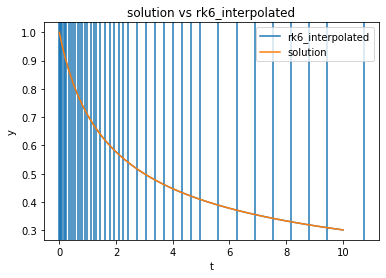

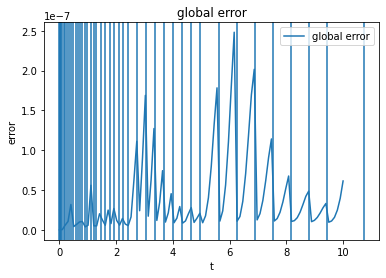

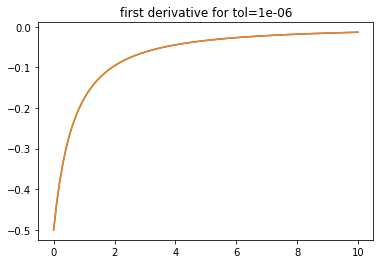

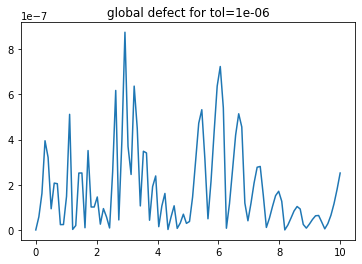

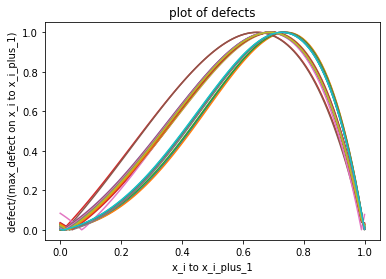

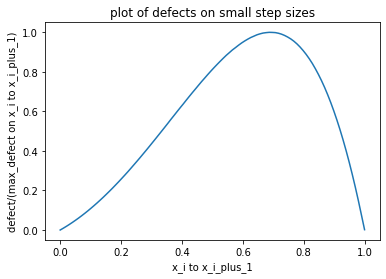

0.0
0.0
0.0
1.6120438317557273e-13
4.652944696204031e-12
1.1303047386945764e-10
2.0178475557131037e-09
1.9808520379527295e-09
1.9388273209131057e-09
2.777040708501488e-09
3.2949033501594727e-09
3.5988408919607195e-09
3.759063282871011e-09
3.8224963194721795e-09
3.8208630703806534e-09
3.775818990803259e-09
3.7022626075966514e-09
3.6105053391466413e-09
5.3485041950906975e-09
5.132156921661135e-09
4.92468132939905e-09
5.529809055104806e-09
5.815587122981469e-09
5.90070703410106e-09
5.860421259384907e-09
5.742945674569455e-09
5.579428918878193e-09
5.390099699909001e-09
7.504218024756426e-09
8.550823604736024e-09
8.966420439460165e-09
9.012684765163925e-09
8.846508081639115e-09
8.562369813169823e-09
8.217374447561099e-09
7.846035987579825e-09
1.0026254604333928e-08
1.0967685148965955e-08
1.1192639925994285e-08
1.1019486434449277e-08
1.0635369473988021e-08
1.014882250460758e-08
9.622217078675277e-09
1.1642151021007408e-08


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
alpha values [0.49999999999999983, 1.0, 0.9999999999999997, 1.0000000000000002, 0.5000000000000002, 1.0000000000000007, 0.9999999999999987, 0.5000000000000007, 1.9999999999999973, 0.5, 2.0, 1.0000000000000029, 0.9999999999999972]
beta values [0.9999999999999998, 1.9999999999999993, 2.000000000000001, 1.0000000000000004, 1.0, 0.9999999999999993, 2.0000000000000013, 1.0000000000000013, 1.9999999999999973, 0.5000000000000007, 2.0, 0.5, 1.0000000000000029, 0.9999999999999972]
n_steps 89
n_successful_steps 82

integration complete


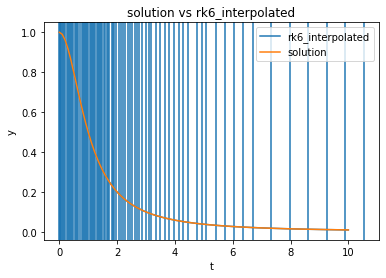

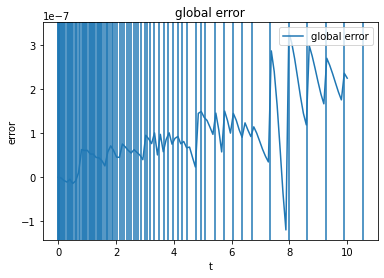

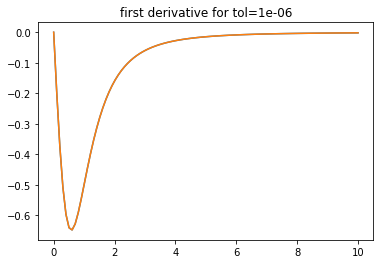

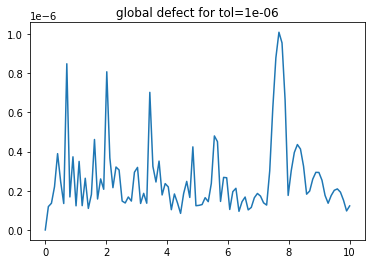

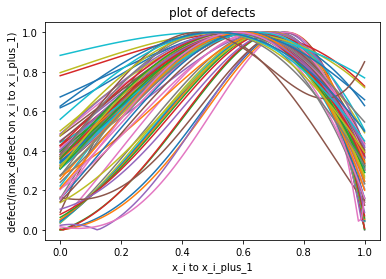

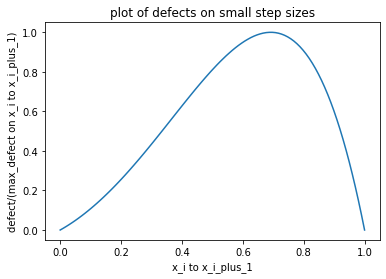

0.0
0.0
0.0
4.156675004196586e-13
2.1636137326197513e-11
1.2003479321620603e-09
2.9542202018006947e-09
5.13947939762005e-09
7.570554294566989e-09
1.0039014064489038e-08
1.2334476662267946e-08
1.4264666337027165e-08
1.56720700861257e-08
1.6445370287776484e-08
1.6524809853812883e-08
1.5901656214012405e-08
1.4612744902997576e-08
1.2731587561987112e-08
1.0357688484674554e-08
7.605580165659376e-09
7.380186739514016e-08
7.142986269137452e-08
6.934631580080008e-08
6.747276592999896e-08
6.57425439642978e-08
6.410143593704731e-08
6.250733874946235e-08
6.092924398348742e-08
5.934583430233786e-08
5.7743911485719224e-08
5.611681808126434e-08
5.4462954812706244e-08
5.278446058021302e-08
5.108608064352538e-08
4.9374233035415216e-08
4.7656261659145827e-08
4.5939860082722106e-08
4.4232642326669236e-08
4.254183788576782e-08
4.0874087225972744e-08
3.923531777250133e-08
3.763068029405403e-08
6.48741705355782e-08
6.132951468895698e-08
5.7993629232200306e-08
7.273292426668299e-08
6.859592910357648e-08
6.47

In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
alpha values [0.49999999999999983, 1.0, 0.5, 1.0000000000000002, 0.5000000000000002, 2.0, 1.0000000000000007, 0.9999999999999987, 1.0000000000000029, 0.9999999999999972]
beta values [0.9999999999999998, 1.9999999999999993, 2.000000000000001, 2.0, 1.0, 0.5, 0.9999999999999993, 1.0000000000000013, 0.9999999999999972, 1.0000000000000029]
n_steps 36
n_successful_steps 35

integration complete


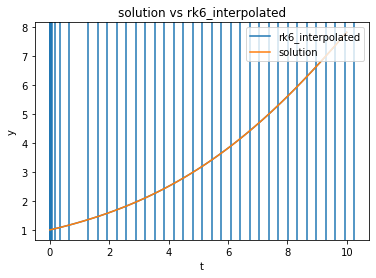

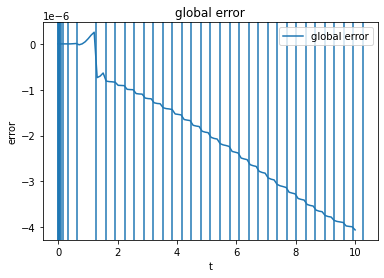

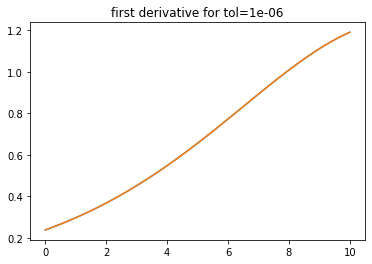

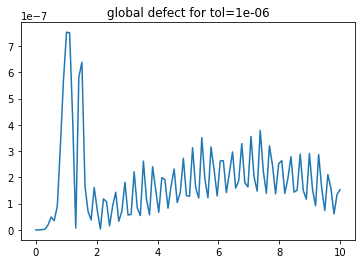

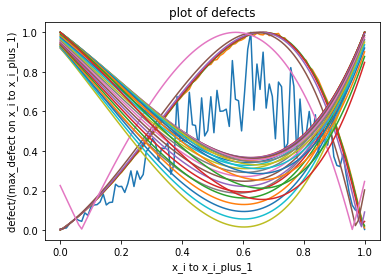

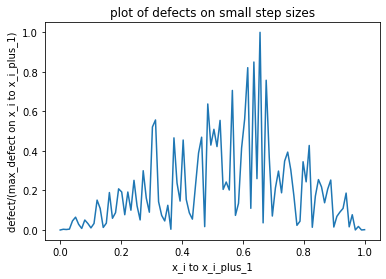

0.0
0.0
0.0
8.881784197001252e-16
1.9984014443252818e-14
6.379341499496149e-13
2.054245662463927e-11
6.660851870066153e-10
2.1866102484224825e-08
7.337523284522973e-07
8.101779633840067e-07
8.922654777254735e-07
9.801665965536444e-07
1.0739942584159223e-06
1.1738150627049748e-06
1.2796413773052961e-06
1.3914232819267625e-06
1.509040521874283e-06
1.6322947180569258e-06
1.760902102798667e-06
1.8944870898707222e-06
2.0325769969353757e-06
2.174598294768515e-06
2.3198747083341686e-06
2.467627517432902e-06
2.616978366454248e-06
2.766954824373613e-06
2.9164988815111315e-06
3.0644784789757296e-06
3.209702028605932e-06
3.350935804391497e-06
3.48692392737604e-06
3.6164105203795316e-06
3.7381635289435167e-06
3.850999540588873e-06
3.953808853651708e-06
4.045579983014136e-06
4.125422721656946e-06


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999972, 1.0000000000000029, 2.0, 1.0000000000000222, 0.9999999999998224, 0.5000000000000888, 1.9999999999996447, 2.0000000000003553, 0.49999999999982236, 2.0000000000007105, 3.9999999999992895, 1.999999999998579, 0.5000000000003553, 31.99999999999997]
beta values [0.9999999999999998, 0.5000000000000001, 0.06250000000000006, 0.1250000000000001, 1.0, 2.0, 0.9999999999999972, 1.0000000000000029, 0.5, 1.0000000000000888, 1.0000000000001776, 1.9999999999996447, 2.0000000000007105, 1.999999999998579, 0.5000000000003553, 0.4999999999999112, 0.24999999999999986, 0.03125000000000003, 0.9999999999999778, 0.5000000000000888, 0.2500000000000444, 0.49999999999982236]
n_steps 6081
n_successful_steps 4988

integration complete


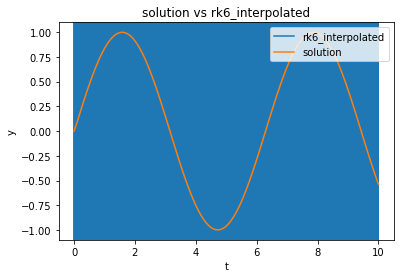

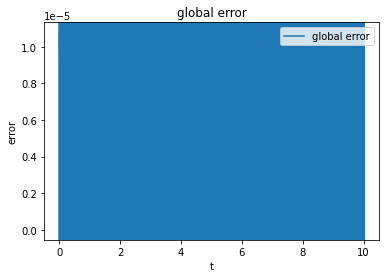

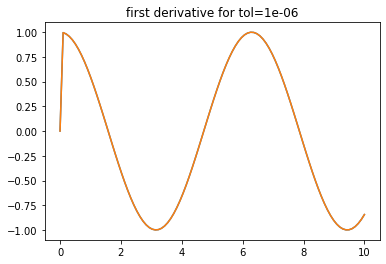

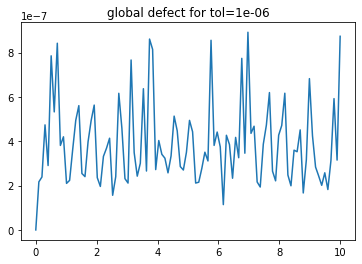

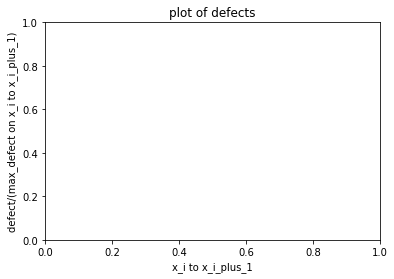

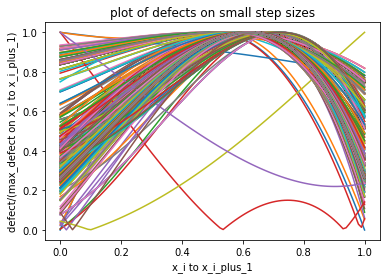

0.0
0.0
0.0
3.3392039133772755e-13
6.472669622503702e-13
1.0592604918202575e-11
3.063652300600017e-10
5.323882983770956e-10
7.009649874434309e-10
8.22470182237911e-10
9.056337693658101e-10
9.577839701901958e-10
9.85056213681501e-10
9.925722604942067e-10
9.845937294639118e-10
9.646534925022987e-10
9.356681193728456e-10
9.000339154519033e-10
8.59708925576852e-10
8.162828572799707e-10
7.710365644564288e-10
7.249927463925943e-10
6.78958875233171e-10
6.335636529297695e-10
1.4384098218078734e-09
1.2925472844815822e-09
1.1609149683233788e-09
1.457205703325748e-09
1.553519375641077e-09
1.5232655761754366e-09
1.4171625539738386e-09
1.26968405927963e-09
1.1037641148292643e-09
9.342153994840174e-10
7.702000703879719e-10
9.021951380416837e-10
1.5649458118272008e-10
1.5534268316130806e-09
1.270569344180572e-09
1.0567955815998786e-09
3.0012638069232267e-09
2.4196767367534733e-09
1.9707299681037682e-09
1.6247599099461496e-09
1.3587360125910664e-09
1.1547776346265692e-09
9.990027416417746e-10
8.806336

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-06
alpha values [0.5000000000000002, 1.0, 2.000000000000001, 0.49999999999999967, 1.9999999999999996, 1.9999999999999987, 0.5000000000000007, 1.9999999999999973, 0.9999999999999987, 2.0, 0.5, 2.0000000000000444, 1.9999999999996447, 2.0000000000007105, 1.0000000000003553, 1.0000000000000222, 0.5000000000000888, 0.4999999999999889, 0.49999999999982236]
beta values [0.9999999999999998, 0.5000000000000001, 1.9999999999999993, 1.0, 1.0000000000000004, 0.49999999999999983, 2.0000000000000013, 0.9999999999999993, 0.5000000000000003, 1.9999999999999973, 1.0000000000000013, 0.5, 2.0, 2.0000000000000444, 1.9999999999996447, 2.0000000000007105, 0.5000000000000007, 0.9999999999999778, 0.5000000000000888, 0.4999999999999889, 0.9999999999996447, 0.49999999999982236]
n_steps 2212
n_successful_steps 1877

integration complete


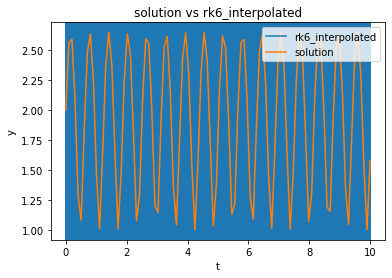

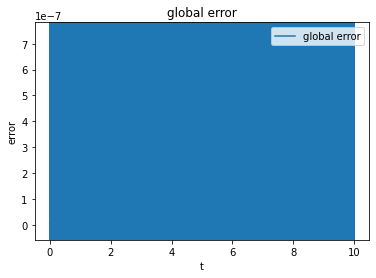

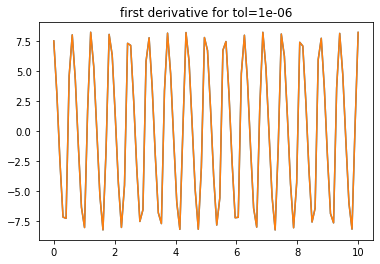

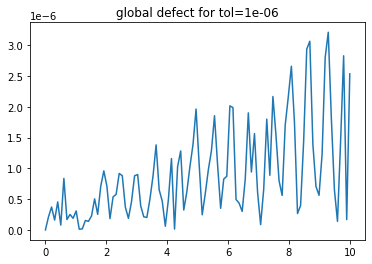

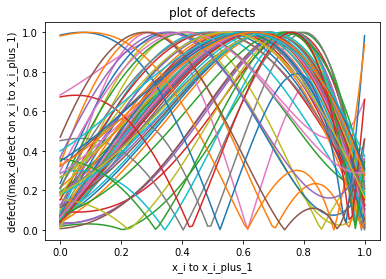

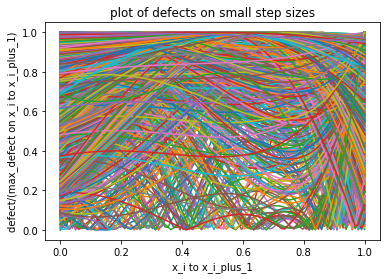

0.0
0.0
0.0
1.9877477441809788e-10
3.9613912150571196e-10
6.756725401402264e-09
6.867441282309983e-09
6.9783214762253465e-09
1.2864215470642648e-08
1.2911412383687093e-08
1.2959887385477487e-08
1.803037941172647e-08
1.803811233713759e-08
1.8047836558565677e-08
2.2065532512272057e-08
2.205444582514815e-08
2.2045753222954545e-08
2.4852347291215438e-08
2.7004931180130143e-08
2.8492774806210264e-08
2.9308845572728615e-08
2.9449477079168673e-08
2.8914186600559333e-08
2.7705636895802854e-08
2.5829731686854984e-08
2.3295857243255114e-08
2.0117281174236723e-08
2.0117163490596113e-08
2.0118823051973322e-08
1.5766310035303377e-08
1.5740141634523752e-08
1.5715201584498573e-08
1.0366296709918288e-08
1.0292270147260751e-08
1.0218551782514851e-08
4.134935505106796e-09
3.988452679237753e-09
3.84090270699744e-09
3.6931626645753113e-09
3.546186011504915e-09
3.4010043670207324e-09
3.2587257337013398e-09
3.1205300565773086e-09
2.987661229525429e-09
2.861407333298871e-09
2.7430753224422233e-09
2.633949058

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-06
alpha values [0.49999999999999983, 1.0, 0.9999999999999997, 1.0000000000000002, 0.5000000000000002, 1.0000000000000007, 0.49999999999999967, 2.0000000000000013, 0.9999999999999987, 0.5000000000000007, 1.9999999999999973]
beta values [0.9999999999999998, 1.9999999999999993, 2.000000000000001, 1.0000000000000004, 1.0, 0.9999999999999993, 2.0000000000000013, 0.49999999999999967, 1.0000000000000013, 1.9999999999999973, 0.5000000000000007]
n_steps 52
n_successful_steps 50

integration complete


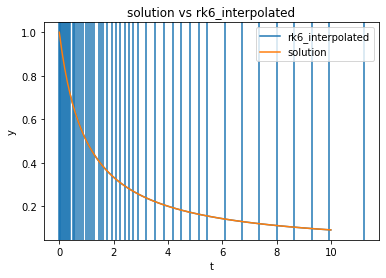

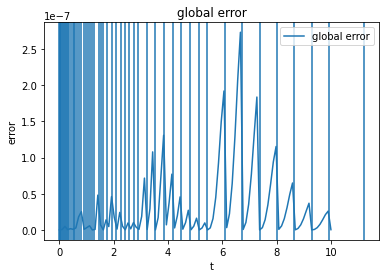

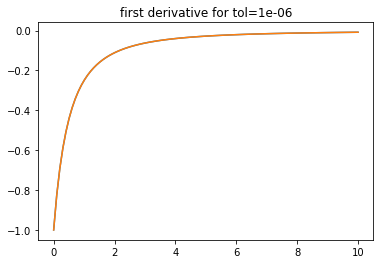

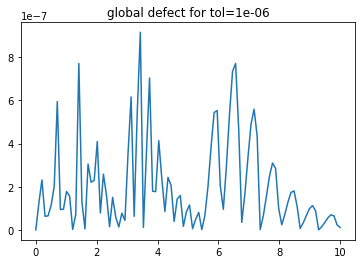

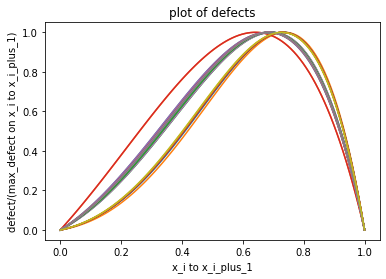

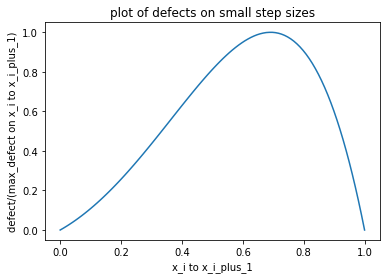

0.0
0.0
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
1.6653345369377348e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.7755575615628914e-16
2.7755575615628914e-16
2.7755575615628914e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.7755575615628914e-16
2.220446049250313e-16
2.7755575615628914e-16
2.220446049250313e-16
2.498001805406602e-16
1.942890293094024e-16
1.6653345369377348e-16
1.6653345369377348e-16
1.942890293094024e-16
1.942890293094024e-16
1.942890293094024e-16
1.942890293094024e-16
1.6653345369377348e-16
1.3877787807814457e-16
1.5265566588595902e-16
1.249000902703301e-16
1.249000902703301e-16
1.249000902703301e-16
1.1102230246251565e-16
9.71445146547012e-17


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
alpha values [0.49999999999999983, 1.0, 0.5, 1.0000000000000002, 0.5000000000000002, 0.9999999999999997, 3.9999999999999973, 0.5000000000000007, 1.9999999999999973, 2.0, 1.0000000000000029, 4.0, 0.4999999999999986]
beta values [0.9999999999999998, 1.9999999999999993, 2.000000000000001, 2.0, 1.0000000000000004, 1.0, 0.49999999999999967, 0.25000000000000017, 1.9999999999999973, 0.5000000000000007, 1.0000000000000013, 0.5, 2.0000000000000058, 0.25, 0.9999999999999972]
n_steps 80
n_successful_steps 70

integration complete


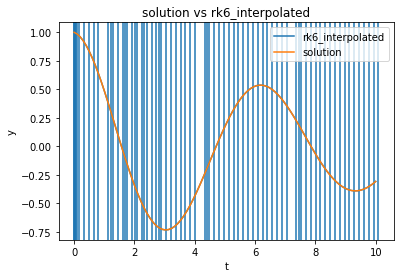

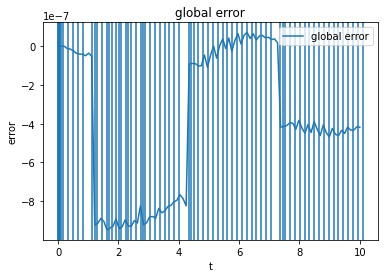

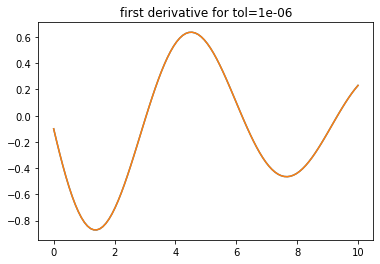

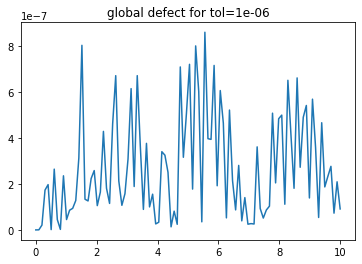

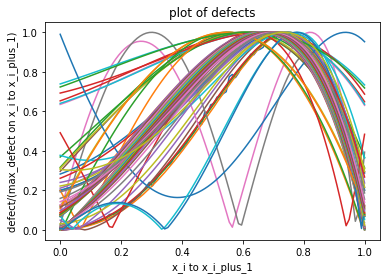

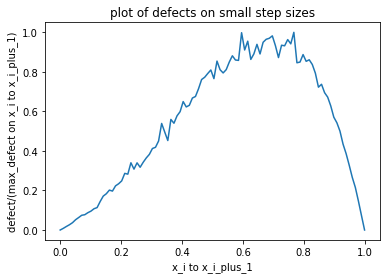

0.0
0.0
0.0
1.5543122344752192e-15
6.750155989720952e-14
3.2197577937154165e-12
1.697695317659509e-10
9.537163836448315e-09
2.3791530856520637e-08
4.233092176786357e-08
6.446490674605343e-08
9.293558543843616e-07
9.228828439233894e-07
9.164806044348328e-07
9.327970842826216e-07
9.488597828358203e-07
9.422514881257671e-07
9.356777193603172e-07
9.493976333430076e-07
9.426793423084057e-07
9.35975237204012e-07
9.446979398752831e-07
9.378338529097974e-07
9.309691204606452e-07
9.327463417196924e-07
9.304743308069519e-07
9.233548380338519e-07
9.16225108671398e-07
9.05711472931614e-07
8.911063177352574e-07
8.726145147575082e-07
8.505378533696373e-07
8.252642499373408e-07
7.972551130386307e-07
7.670312407448421e-07
9.035510656341117e-08
8.894358968780658e-08
8.753271504846616e-08
6.353133161218771e-08
4.0119051476772416e-08
1.784884584576929e-08
2.7723640605437083e-09
2.129513432258534e-08
3.733710579600924e-08
5.059060614875932e-08
6.08281153779977e-08
6.7905524314682e-08
7.176317218249295e-08

In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
alpha values [0.49999999999999983, 1.0, 1.9999999999999993, 1.0000000000000002, 0.5000000000000002, 0.5, 2.0000000000000013, 0.49999999999999967, 1.9999999999999987, 0.5000000000000007, 1.9999999999999973, 2.0000000000000027, 2.0, 0.9999999999999987, 1.0000000000000056, 0.4999999999999972, 1.0000000000000029, 0.9999999999999972]
beta values [0.9999999999999998, 1.9999999999999993, 2.000000000000001, 1.0000000000000004, 0.5000000000000002, 1.0, 2.0, 0.49999999999999967, 2.0000000000000013, 0.9999999999999993, 1.9999999999999973, 0.5, 0.5000000000000003, 2.000000000000011, 0.5000000000000007, 0.9999999999999972, 0.4999999999999993, 1.0000000000000029, 1.0000000000000013, 0.9999999999999944]
n_steps 106
n_successful_steps 94

integration complete


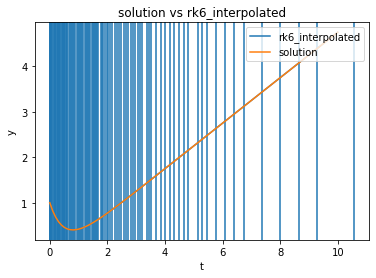

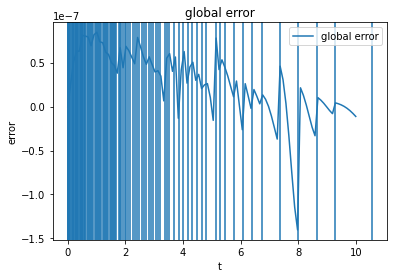

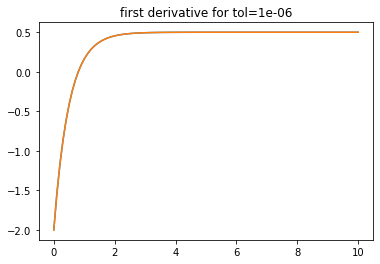

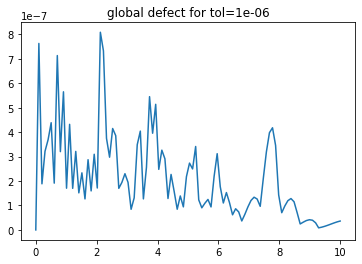

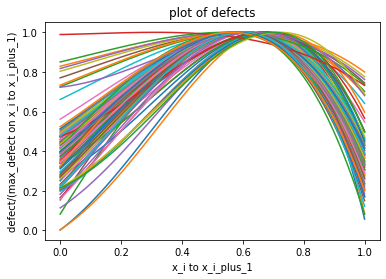

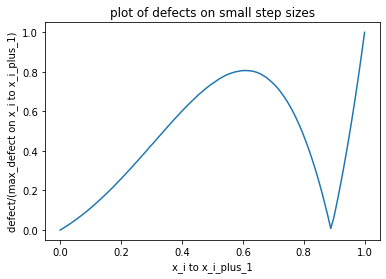

0.0
0.0
0.0
3.191991115869541e-11
1.0285582385805014e-09
3.1427454083576833e-08
3.108021484621304e-08
3.071188814374182e-08
5.4322264242401275e-08
5.2946446782442536e-08
5.159500371387793e-08
6.97597452026244e-08
6.766710392014375e-08
6.563131660364263e-08
7.944460800324293e-08
7.687719394411374e-08
7.438897597911165e-08
8.474048718287719e-08
8.188444483581137e-08
7.912209071259113e-08
8.673353446564391e-08
8.37303421041824e-08
8.082931352015876e-08
8.628466274807067e-08
8.3240271731011e-08
8.030196535502299e-08
8.407240659202841e-08
8.678840485165651e-08
8.858981148662792e-08
8.960120634338153e-08
8.993341904517393e-08
8.96849071119199e-08
8.89430032402494e-08
8.778504395623443e-08
8.627939052097133e-08
8.448635163693652e-08
8.245901789161181e-08
8.024401498829548e-08
7.788218403526059e-08
7.540919544357649e-08
7.28561026508423e-08
7.024984116643651e-08
6.761367815633079e-08
6.496761739693824e-08
6.232876326173198e-08
5.971164884766011e-08
5.712852990669148e-08
5.4589648912362065e-08


In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)